## 设置Matplotlib中文字体

In [23]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [24]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [25]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-04-28 22:17:29--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  18.3MB/s    用时 0.5s    

2025-04-28 22:17:30 (18.3 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



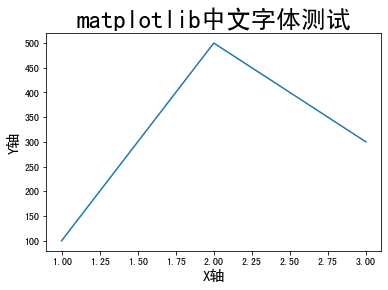

In [26]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [27]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 进入MMSegmentation主目录

In [28]:
import os
#os.chdir('mmsegmentation')

In [29]:
os.getcwd()

'/home/featurize/work/MMSegmentation_Tutorials-main/20230215/【D1】Kaggle代码实战-肾小球切片语义分割'

## 导入工具包

In [30]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 类别列表

In [31]:
# 类别列表
class_list = ['background', 'glomeruili']

## 载入日志文件

In [32]:
# 日志文件路径
log_path = './work_dirs/tutorial/20250428_181827/20250428_181827.log'

In [33]:
with open(log_path, 'r') as f:
    logs = f.read()

In [34]:
## 定义正则表达式
import re
import numpy as np

def transform_table_line(raw):
    raw = list(map(lambda x: x.split('|'), raw))
    raw = list(map(
      lambda row: list(map(
          lambda col: float(col.strip()),
          row
      )),
      raw
    ))
    return raw

## 横轴-训练迭代次数

In [35]:
x = range(500, 24500, 500)

In [36]:
len(x)

48

## 定义正则表达式

In [37]:
metrics_json = {}
for each_class in class_list: # 遍历每个类别
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # 定义该类别的正则表达式
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)

In [38]:
# 匹配
for each_class in class_list: # 遍历每个类别
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # 粗匹配
    find_string = transform_table_line(find_string) # 精匹配
    metrics_json[each_class]['metrics'] = find_string

In [39]:
metrics_json.keys()

dict_keys(['background', 'glomeruili'])

In [40]:
metrics_json

{'background': {'re_pattern': re.compile(r'\s+background.*?\|(.*)?\|',
  re.UNICODE),
  'metrics': [[98.19, 98.48, 99.09, 99.09, 99.7, 98.48],
   [99.47, 99.85, 99.73, 99.73, 99.61, 99.85],
   [95.8, 95.94, 97.85, 97.85, 99.85, 95.94],
   [98.7, 98.8, 99.34, 99.34, 99.9, 98.8],
   [99.58, 99.8, 99.79, 99.79, 99.79, 99.8],
   [99.58, 99.78, 99.79, 99.79, 99.8, 99.78],
   [98.58, 100.0, 99.28, 99.28, 98.58, 100.0],
   [99.58, 99.94, 99.79, 99.79, 99.64, 99.94],
   [99.5, 99.94, 99.75, 99.75, 99.56, 99.94],
   [99.63, 99.9, 99.82, 99.82, 99.73, 99.9],
   [99.62, 99.89, 99.81, 99.81, 99.73, 99.89],
   [99.69, 99.88, 99.85, 99.85, 99.81, 99.88],
   [99.69, 99.88, 99.85, 99.85, 99.82, 99.88],
   [99.57, 99.77, 99.78, 99.78, 99.8, 99.77],
   [99.69, 99.85, 99.85, 99.85, 99.84, 99.85],
   [99.7, 99.85, 99.85, 99.85, 99.85, 99.85],
   [99.63, 99.93, 99.82, 99.82, 99.7, 99.93],
   [99.7, 99.85, 99.85, 99.85, 99.85, 99.85],
   [99.69, 99.83, 99.84, 99.84, 99.85, 99.83],
   [99.68, 99.82, 99.84, 9

## 查看某一类别的评估指标 IoU Acc Dice Fscore Precision Recall

In [41]:
each_class = 'background'
each_class_metrics = np.array(metrics_json[each_class]['metrics'])

x 和 each_class_metrics 长度匹配。


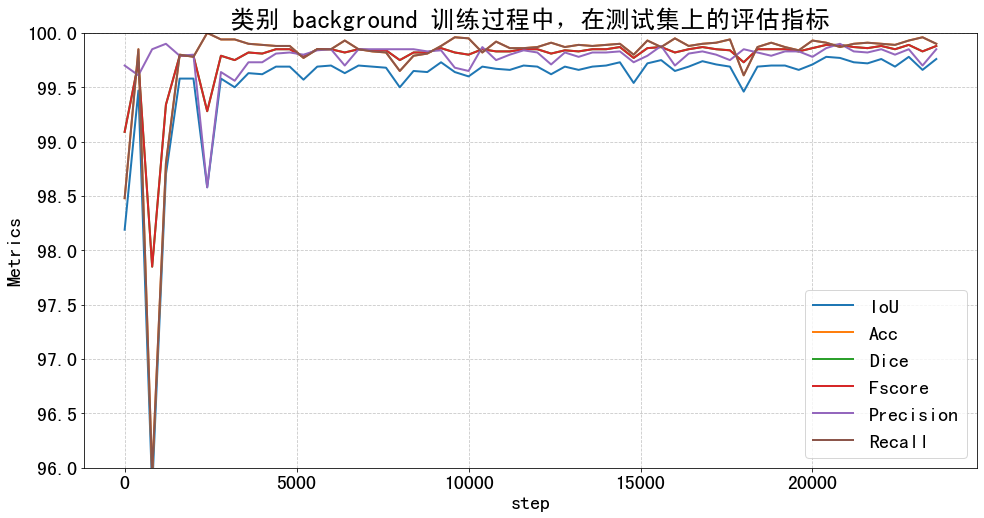

In [42]:
# 每隔 100 步记录一次指标
step_interval =400
x = np.arange(0, len(each_class_metrics) * step_interval, step_interval)

# 检查 x 和 each_class_metrics 长度是否匹配
if len(x) != len(each_class_metrics):
    print(f"错误：x 的长度 {len(x)} 与 each_class_metrics 的行数 {len(each_class_metrics)} 不匹配。")
else:
    print("x 和 each_class_metrics 长度匹配。")

# 检查数据中是否包含 NaN 或 inf
if np.isnan(each_class_metrics).any() or np.isinf(each_class_metrics).any():
    print("警告：each_class_metrics 中包含 NaN 或 inf 值。")
    each_class_metrics = np.nan_to_num(each_class_metrics)

# 定义 get_line_arg 函数
def get_line_arg():
    return {'linestyle': '-', 'linewidth': 2}

plt.figure(figsize=(16, 8))

for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):
    try:
        plt.plot(x, each_class_metrics[:, idx], label=each_metric, **get_line_arg())
    except IndexError:
        print(f"错误：索引 {idx} 超出了 each_class_metrics 的列数范围。")
    except TypeError:
        print(f"错误：each_class_metrics 的数据类型可能不正确。")

plt.tick_params(labelsize=20)

plt.ylim([96,100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title(f'类别 {each_class} 训练过程中，在测试集上的评估指标', fontsize=25)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=20)

plt.savefig(f'./mmsegmentation/图表/类别 {each_class} 训练过程评估指标4.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [43]:
each_class = 'glomeruili'
each_class_metrics = np.array(metrics_json[each_class]['metrics'])

x 和 each_class_metrics 长度匹配。
警告：each_class_metrics 中包含 NaN 或 inf 值。


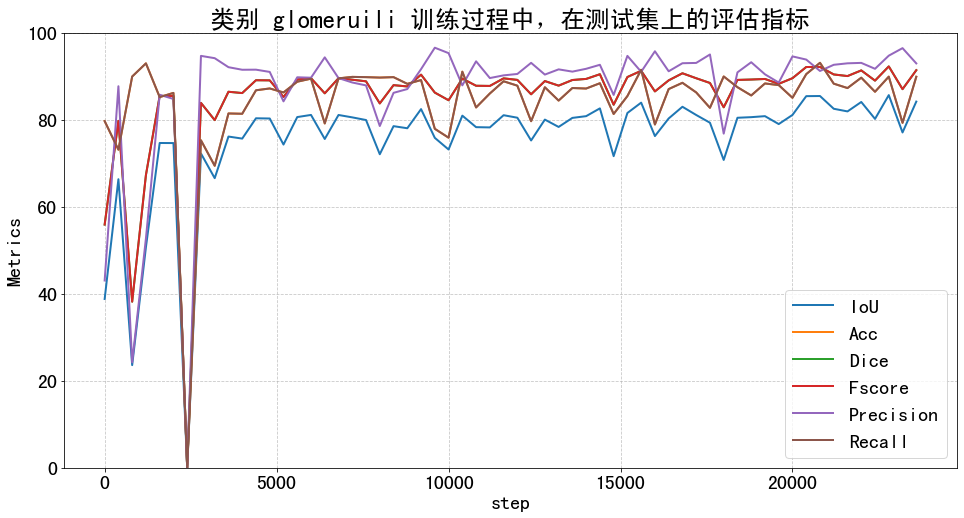

In [44]:
# 每隔 100 步记录一次指标
step_interval =400
x = np.arange(0, len(each_class_metrics) * step_interval, step_interval)

# 检查 x 和 each_class_metrics 长度是否匹配
if len(x) != len(each_class_metrics):
    print(f"错误：x 的长度 {len(x)} 与 each_class_metrics 的行数 {len(each_class_metrics)} 不匹配。")
else:
    print("x 和 each_class_metrics 长度匹配。")

# 检查数据中是否包含 NaN 或 inf
if np.isnan(each_class_metrics).any() or np.isinf(each_class_metrics).any():
    print("警告：each_class_metrics 中包含 NaN 或 inf 值。")
    each_class_metrics = np.nan_to_num(each_class_metrics)

# 定义 get_line_arg 函数
def get_line_arg():
    return {'linestyle': '-', 'linewidth': 2}

plt.figure(figsize=(16, 8))

for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):
    try:
        plt.plot(x, each_class_metrics[:, idx], label=each_metric, **get_line_arg())
    except IndexError:
        print(f"错误：索引 {idx} 超出了 each_class_metrics 的列数范围。")
    except TypeError:
        print(f"错误：each_class_metrics 的数据类型可能不正确。")

plt.tick_params(labelsize=20)

plt.ylim([0,100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title(f'类别 {each_class} 训练过程中，在测试集上的评估指标', fontsize=25)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=20)

plt.savefig(f'./mmsegmentation/图表/类别 {each_class} 训练过程评估指标4.pdf', dpi=120, bbox_inches='tight')

plt.show()